<a href="https://colab.research.google.com/github/binliu0630/TimeSeries/blob/main/TimeSeries_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')

In [5]:
data.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [8]:
!pip install pystan==2.19.1.1

!pip install prophet

     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 179 kB 42.1 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639802 sha256=139775d448928981efd70e209fab10a832e2921f9cd0d795728deb08e26a1e7d
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [9]:
from prophet import Prophet

In [10]:
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
model

In [12]:
future = model.make_future_dataframe(periods=365)

In [13]:
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [15]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.040603,8.198357,9.493496,8.040603,8.040603,0.803055,0.803055,0.803055,0.352293,0.352293,0.352293,0.450762,0.450762,0.450762,0.0,0.0,0.0,8.843657
1,2007-12-11,8.039061,7.980022,9.174561,8.039061,8.039061,0.553139,0.553139,0.553139,0.119645,0.119645,0.119645,0.433495,0.433495,0.433495,0.0,0.0,0.0,8.592200
2,2007-12-12,8.037518,7.782710,8.971703,8.037518,8.037518,0.350502,0.350502,0.350502,-0.066660,-0.066660,-0.066660,0.417162,0.417162,0.417162,0.0,0.0,0.0,8.388020
3,2007-12-13,8.035976,7.742076,8.985100,8.035976,8.035976,0.329951,0.329951,0.329951,-0.072258,-0.072258,-0.072258,0.402209,0.402209,0.402209,0.0,0.0,0.0,8.365927
4,2007-12-14,8.034434,7.727187,8.966449,8.034434,8.034434,0.319465,0.319465,0.319465,-0.069577,-0.069577,-0.069577,0.389042,0.389042,0.389042,0.0,0.0,0.0,8.353899


In [17]:
forecast[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].head()

,ds,yhat_lower,yhat,yhat_upper
0,2007-12-10,8.198357,8.843657,9.493496
1,2007-12-11,7.980022,8.592200,9.174561
2,2007-12-12,7.782710,8.388020,8.971703
3,2007-12-13,7.742076,8.365927,8.985100
4,2007-12-14,7.727187,8.353899,8.966449


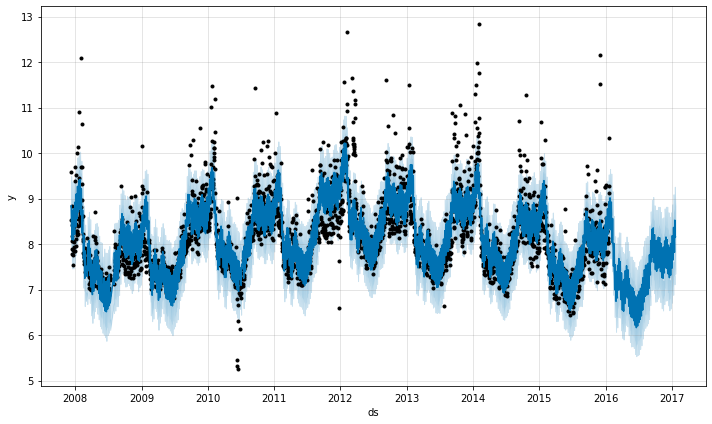

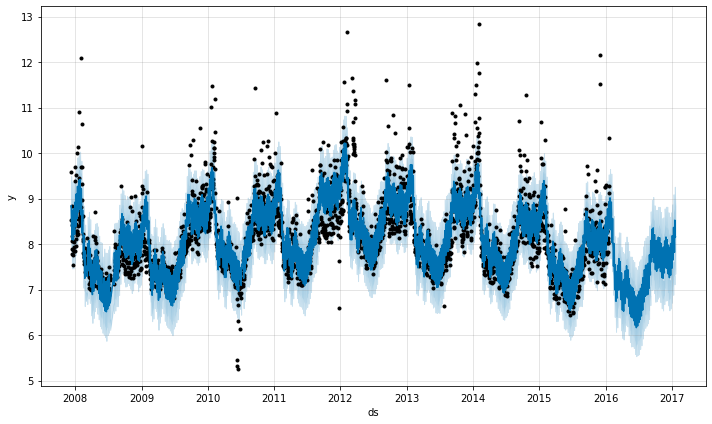

In [18]:
model.plot(forecast)

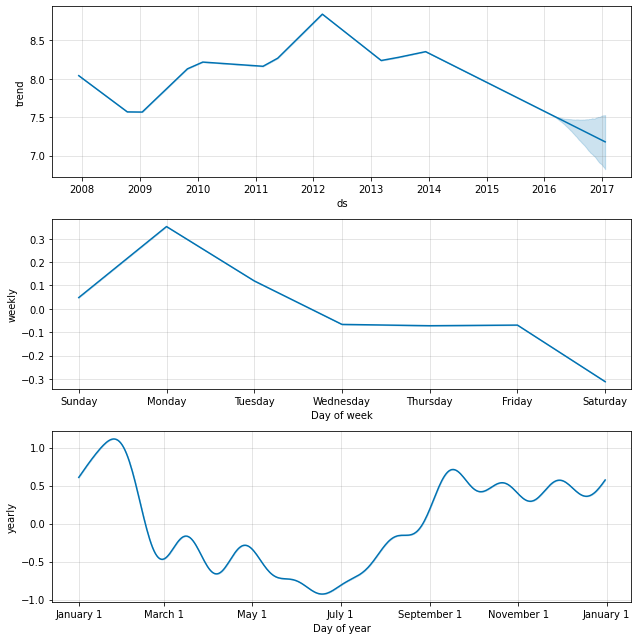

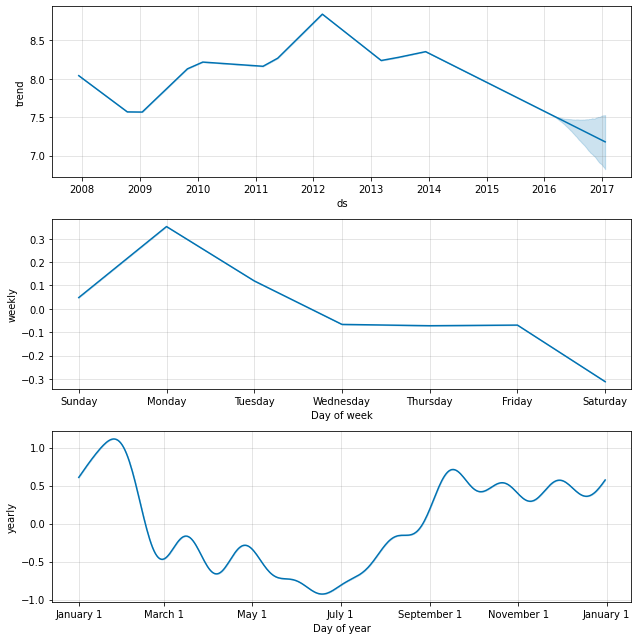

In [19]:
model.plot_components(forecast)

In [21]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [23]:
# Python
plot_components_plotly(model, forecast)
